<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Naive_Bayes_Assign_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **classification model using Naive Bayes for salary data **

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
df = pd.read_csv('/content/SalaryData_Test.csv',encoding='latin')  # read data

In [4]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
df.isnull().sum() # No null value in data

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() #encoding colum
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['maritalstatus']= label_encoder.fit_transform(df['maritalstatus'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['native']= label_encoder.fit_transform(df['native'])
df['Salary']= label_encoder.fit_transform(df['Salary'])

In [8]:
df['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64>

In [9]:
df.describe() # Total count ,mean,standerd deviation and quantile

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596,0.245684
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922,0.430506
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


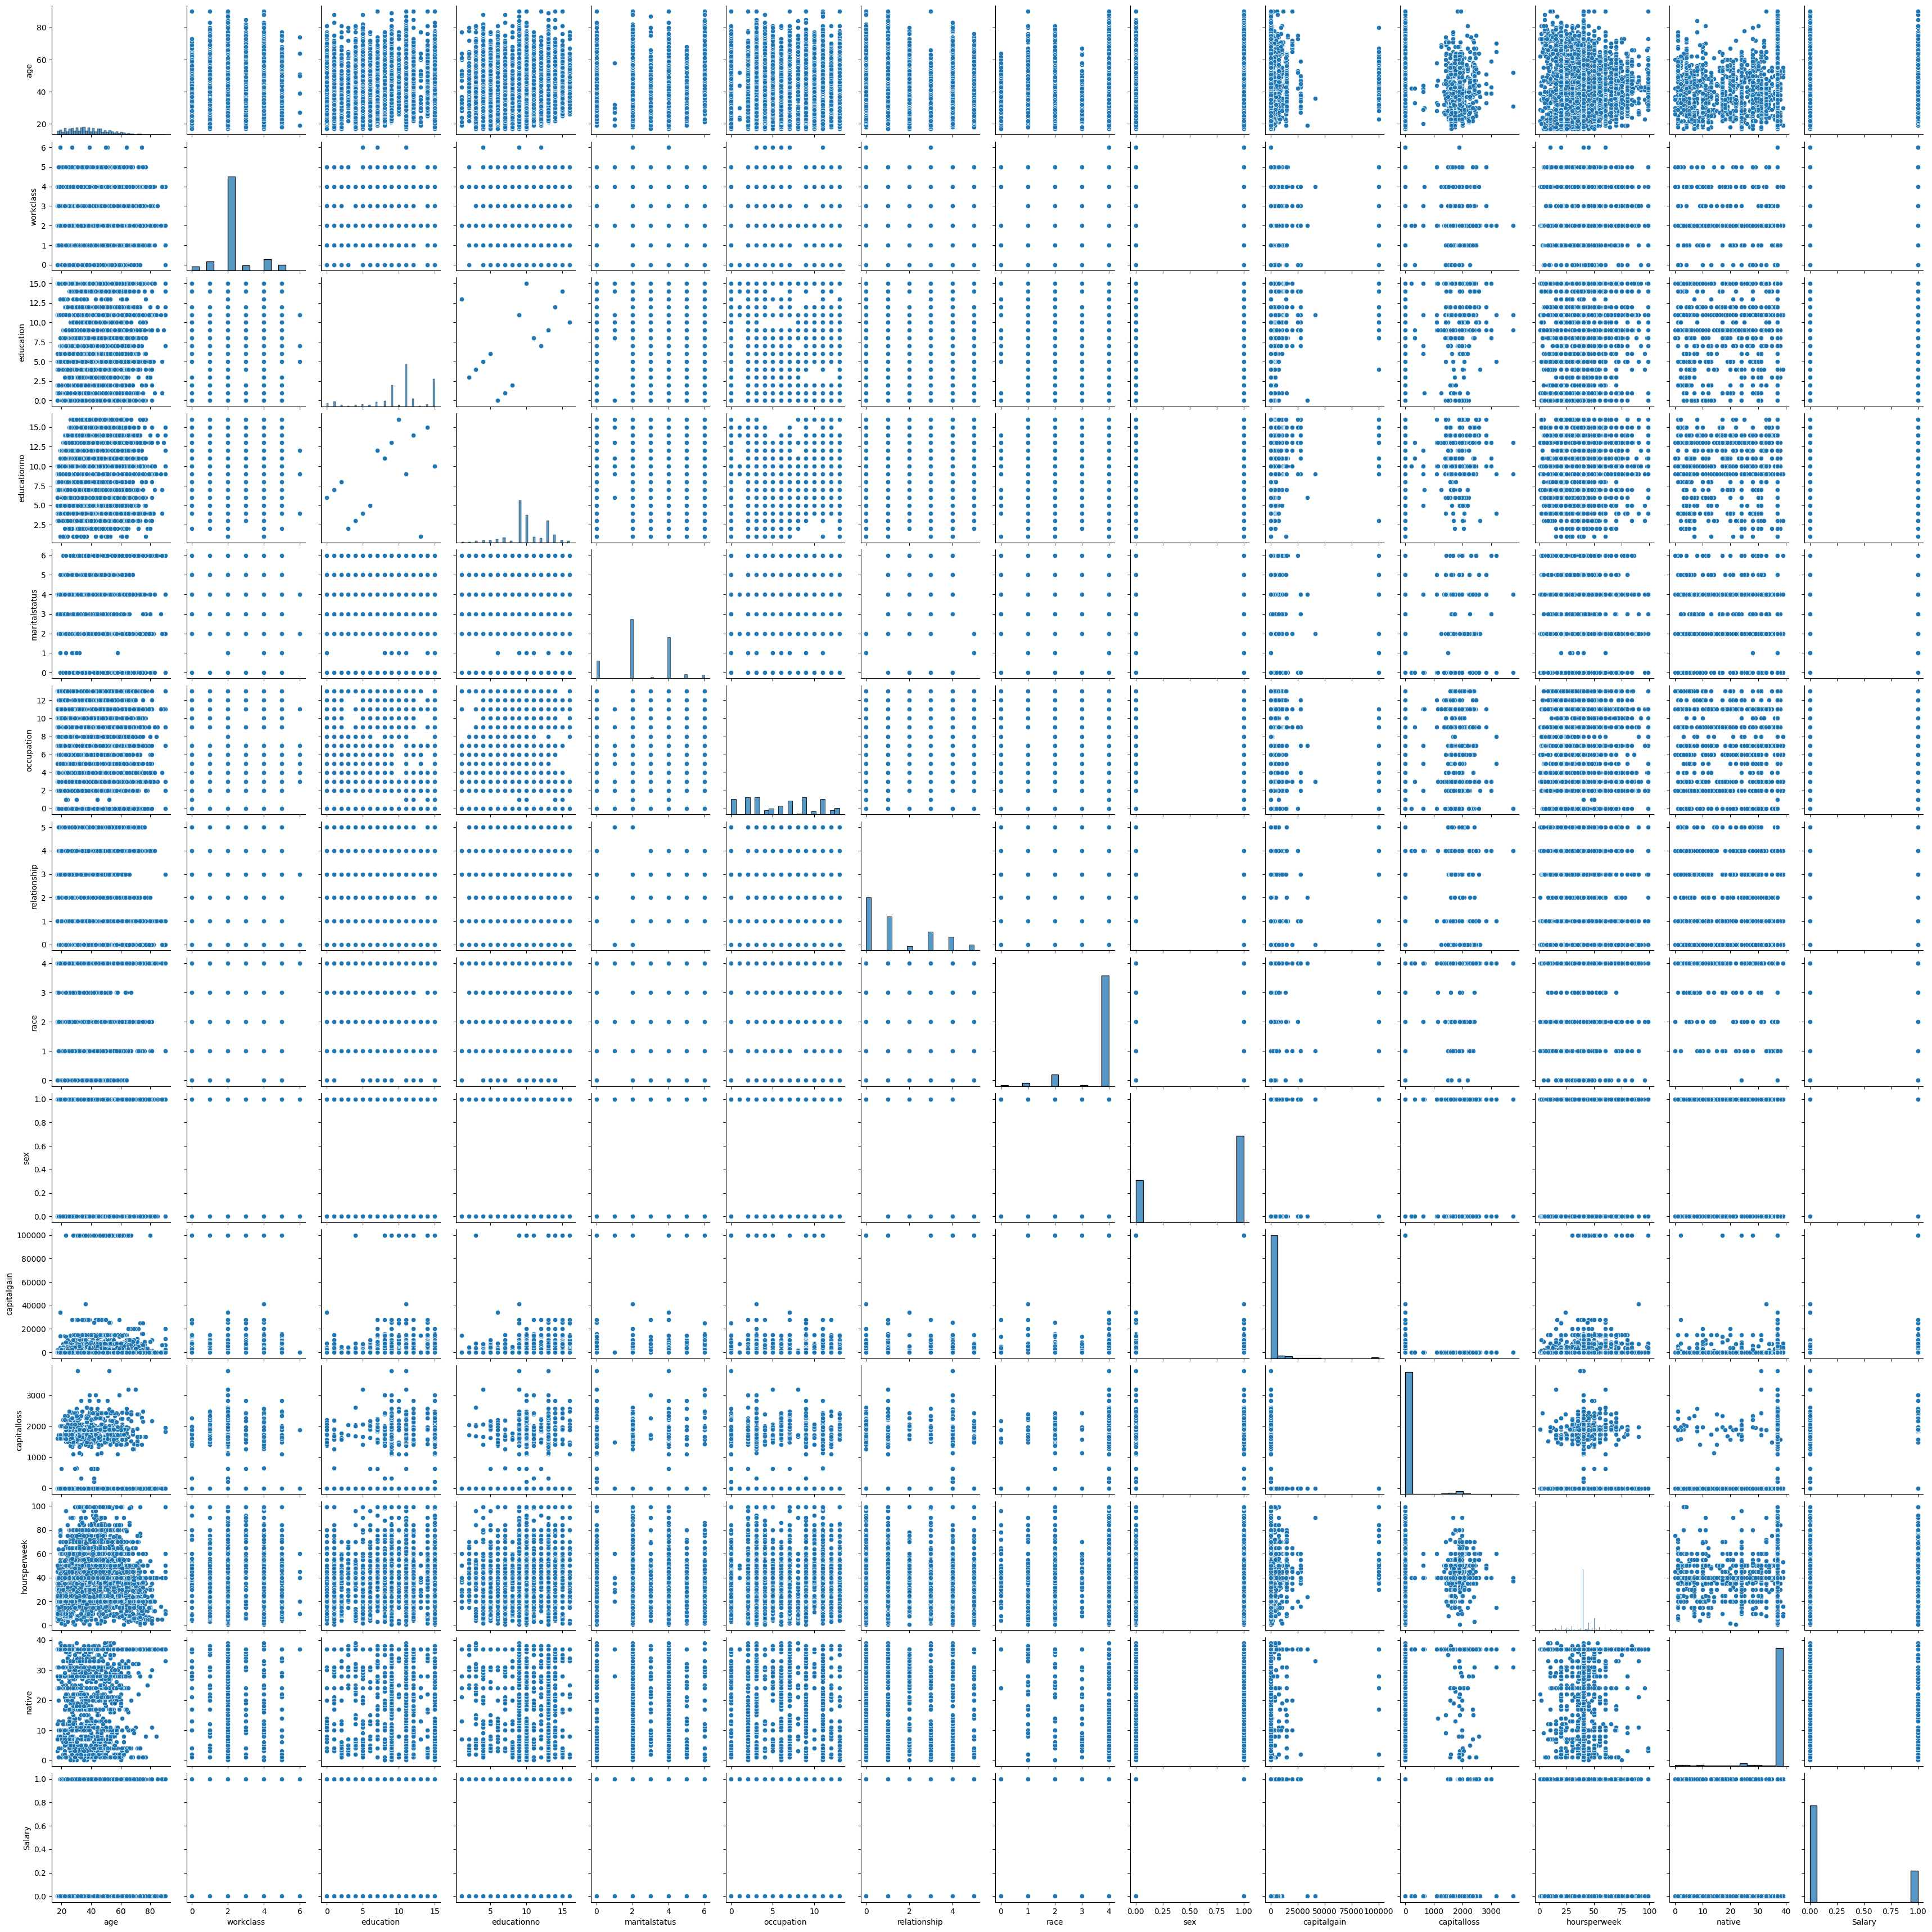

In [10]:
import seaborn as sns
sns.pairplot(df)  # show correlation between each other

In [11]:
df.info

<bound method DataFrame.info of        age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitallos

In [12]:
df.dropna(axis=0,how='any',inplace=False) #drop row contain na value
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [13]:
x =df.drop(['Salary'], axis=1)
y = df['Salary']

In [14]:
y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [15]:
x.shape

(15060, 13)

In [16]:
y.shape

(15060,)

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.naive_bayes import MultinomialNB  # fitting model
from sklearn.metrics import classification_report
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(classification_report(ytest,ypred))
print(nb.score(xtrain,ytrain)) # Train accuracy
print(nb.score(xtest,ytest)) # Test accuracy

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      3424
           1       0.63      0.23      0.34      1094

    accuracy                           0.78      4518
   macro avg       0.71      0.59      0.60      4518
weighted avg       0.75      0.78      0.74      4518

0.7726237905520774
0.7804338202744577


In [ ]:
# here naive bayes is giving 77% training and 78 % test accuracy. so its a generalized model

Text(0, 0.5, 'Frequency')

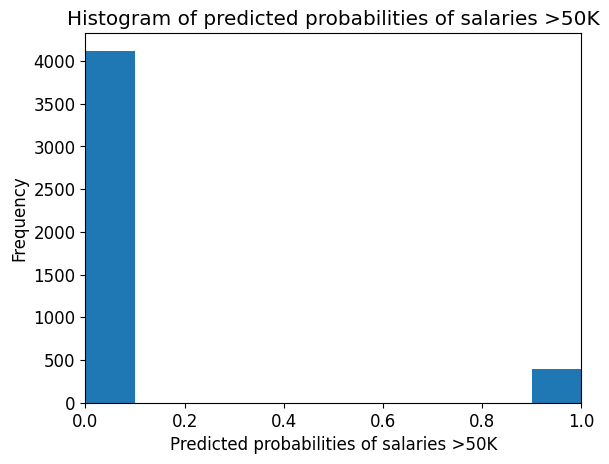

In [19]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(ypred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

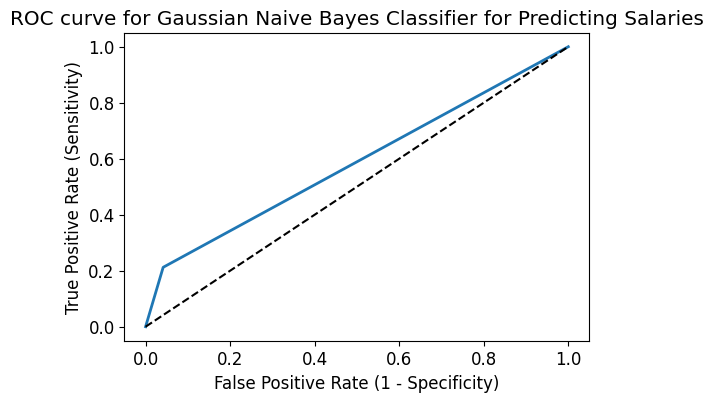

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(ytest, ypred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()